C:\Users\utilisateur\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\utilisateur\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\utilisateur\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


La table qui regroupe toutes les données web et ERP a été enregistrée dans data/merged_data.csv
Le chiffre d'affaires par produit est maintenant disponible dans la colonne 'sales'
Le chiffre d'affaires total réalisé est de 70568.6


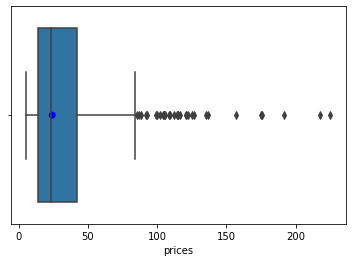

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def merge_tables():
    
    """Ici, on fusionne les dataframes issues de web.xlsx et erp.xlsx en prenant en compte 
    les correspondances d'ID dans liaison.xlsx"""
    
    #On commence par charger les fichiers xlsx qui nous intéressent
    web_filepath = "data/web.xlsx"
    erp_filepath = "data/erp.xlsx"
    liaison_filepath = "data/liaison.xlsx"

    web_df = pd.read_excel(web_filepath)
    erp_df = pd.read_excel(erp_filepath)
    liaison_df = pd.read_excel(liaison_filepath)
    
    web_df.rename(columns={"sku": "id_web"}, inplace=True)
    
    unique_df = pd.merge(pd.merge(erp_df, liaison_df, on='product_id'), web_df, on="id_web")
    unique_df = unique_df[unique_df["id_web"].notnull()]
    unique_df = unique_df[unique_df["post_type"] == "product"]
    return unique_df

def calculate_sales(dataframe):
        
    """Cette fonction ajoute une colonne 'sales' à la dataframe reçue en argument, et y écrit
    le chiffre d'affaires de chaque produit. Elle calcule ensuite le chiffre d'affaires total.
    Valeur de retour : tuple de la forme (dataframe qui contient les chiffres d'affaires, 
    chiffre d'affaires global)"""
    
    def calculate_row_sales(row): 
        
        """Renvoit simplement le produit du prix et du nombre de ventes d'une ligne pour calculer les ventes
        totales d'un produit"""
        
        return float(row["price"]) * (row["total_sales"])
            
    
    sales = []
    
    for index, row in dataframe.iterrows():
        sales.append(calculate_row_sales(row))
    dataframe["sales"] = sales
    
    dataframe.to_csv("data/merged_data.csv", sep="\t")
    print("La table qui regroupe toutes les données web et ERP a été enregistrée dans data/merged_data.csv")
    return dataframe


unique_df = merge_tables()
calculate_sales(unique_df)
print("Le chiffre d'affaires par produit est maintenant disponible dans la colonne 'sales'")
total_sales = unique_df["sales"].sum()
print(f"Le chiffre d'affaires total réalisé est de {total_sales}")



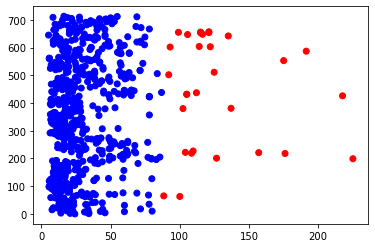

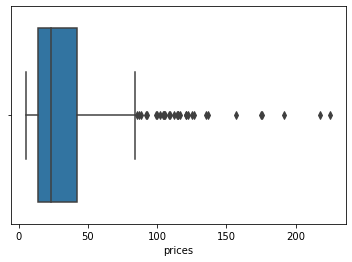

In [72]:
def mean(values):
    total = sum(values)
    return total/len(values)

def variance(values):
    total = 0
    mean_value = mean(values)
    for i in values:
        total += (i - mean_value) ** 2
    
    return total/len(values)

def standard_deviation(values):
    variance_value = variance(values)
    return variance_value ** 0.5

def analyze_prices_data(dataframe):
    
    indexes = []
    prices = []
    z_scores = []
    prices_features = {}
    mean_price = mean(dataframe["price"])
    deviation = standard_deviation(dataframe["price"])
    
    index = 0
    for price in dataframe["price"]:
        z = (price-mean_price)/deviation
        indexes.append(index)
        prices.append(price)
        z_scores.append(z)
        index += 1
    
    prices_features = {"indexes": indexes,
                      "prices": prices,
                      "z scores": z_scores}
    
    quartiles = dataframe["price"].quantile([0.25,0.75 ])        
    
    plot_scatter(prices_features)
    plot_boxplot(prices_features)
        

def plot_scatter(data_features):
    
    plot_df = pd.DataFrame(data_features)
    colors = np.where(plot_df["z scores"] >= 2,'r','b')
    
    fig, ax = plt.subplots()
    ax.scatter(data_features["prices"], data_features["indexes"], c=colors, vmin=0, vmax=100)
    
    plt.show()

def plot_boxplot(data_features):
    plot_df = pd.DataFrame(data_features)
    sns.boxplot(x=plot_df["prices"])

analyze_prices_data(unique_df)